# Initialization

In [9]:
import numpy as np
from pprint import pprint
from copy import deepcopy


from laboneq.contrib.example_helpers.generate_descriptor import generate_descriptor
#from laboneq.contrib.example_helpers.generate_device_setup import generate_device_setup
from laboneq.dsl.device import DeviceSetup




descriptor = generate_descriptor(
    #pqsc=[""], # 장비 여러개 사용시
    shfqc_6=["DEV12256"],
    number_data_qubits=6,
    multiplex=True,
    number_multiplex=6,
    include_cr_lines=True,
    include_ef_lines=True,
    get_zsync=False,  # Only set to True when using real device
    save = True,
    filename="TG_RIP",
    ip_address="192.168.0.83"
)


#descriptor
setup = DeviceSetup.from_descriptor(yaml_text=descriptor, server_host="192.168.0.83")
#setup
setup.instruments[0].device_options = 'SHFQC/PLUS/QC6CH'
#setup.instruments

In [10]:
from laboneq.simple import Session
session = Session(setup)
session.connect(ignore_version_mismatch=False, do_emulation=False)
#session.disconnect()

[2025.12.21 13:19:07.707] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is /home/yalgaeahn/JSAHN/qubit-experiment/examples/laboneq_output/log
[2025.12.21 13:19:07.708] INFO    VERSION: laboneq 25.10.2
[2025.12.21 13:19:07.708] INFO    Connecting to data server at 192.168.0.83:8004
[2025.12.21 13:19:07.748] INFO    Connected to Zurich Instruments LabOne Data Server version 25.10.1.4 at 192.168.0.83:8004
[2025.12.21 13:19:07.778] INFO    Configuring the device setup
[2025.12.21 13:19:07.810] INFO    The device setup is configured


In [3]:
from qpu_types import TransmonQubit, TransmonQubitParameters
from helper import load_qubit_parameters, save_qubit_parameters
from operations import TransmonOperations
from laboneq.dsl.quantum.qpu import QPU, QuantumPlatform



_loaded_qubits = load_qubit_parameters(filename="latest") 
#qubits = TransmonQubit.from_device_setup(setup) # Also can be done with load_qubit_parameters 
qubits = list(_loaded_qubits.values())





qpu = QPU(quantum_elements=qubits, quantum_operations=TransmonOperations())
#quantum_platform = QuantumPlatform(setup=setup, qpu=qpu)

# qpu.topology.add_edge("bus", "q16", "q17")
# qpu.topology.add_edge("bus", "q17", "q18")
# qpu.topology.add_edge("bus", "q18", "q19")
# qpu.topology.plot()




from laboneq.simple import workflow
folder_store = workflow.logbook.FolderStore("./experiment_store") 
folder_store.activate()
#folder_store.deactivate()
#workflow.logbook.LoggingStore().activate()
#workflow.logbook.LogbookStore().deactivate()


LOADED:./qubit_parameters/20251220-1859_COSPEC20.json


BF 7

In [ ]:
# 0 : 15 , 1 : 16 , 2 : 17, 3 : 18, 4 : 19
# for q in qubits:
#     #q.parameters.ge_drive_pulse["sigma"] = 0.25
#     q.parameters.readout_amplitude = 1.0
#     q.parameters.reset_delay_length = 20e-6

#     q.parameters.readout_range_out = -10
#     q.parameters.readout_range_in = 0
#     q.parameters.drive_range = 10

#     q.parameters.readout_lo_frequency = 7.6e9
#     q.parameters.drive_lo_frequency = 4.8e9

#     q.parameters.spectroscopy_length = 10e-6

#     q.parameters.ge_drive_length =64e-9
#     q.parameters.readout_integration_delay =  200e-9#####

 
# qubits[0].parameters.resonance_frequency_ge = 4.949e9
# qubits[0].parameters.readout_resonator_frequency = 7.6283e9

# qubits[1].parameters.resonance_frequency_ge = 4.704e9
# qubits[1].parameters.readout_resonator_frequency = 7.3116e9



# qubits[2].parameters.drive_lo_frequency = 5.6e9
# qubits[2].parameters.resonance_targ_frequency = 5.6e9
# # qubits[2].parameters.resonance_frequency_ge = 4.716e9
# qubits[3].parameters.resonance_frequency_ge = 4.664e9
# qubits[4].parameters.resonance_frequency_ge = 4.779e9

# qubits[2].parameters.readout_resonator_frequency = 6.9226e9
# qubits[3].parameters.readout_resonator_frequency = 6.8433e9
# qubits[4].parameters.readout_resonator_frequency = 6.7739e9



3 oscillator to be calibrated
- `drive_local_osc`
- `readout_local_osc`
- `readout_acquire_osc`

In [ ]:
# from laboneq.dsl.calibration import Calibration, Oscillator, SignalCalibration

# sibal= SignalCalibration()
# sibal.delay_signal

In [ ]:
# from experiments import signal_propagation_delay
# options = signal_propagation_delay.experiment_workflow.options()
#workflow.show_fields(options)

Correcting propagation delay. 

$\Delta \phi =-2\pi f t$ $\implies$ $\tau = \frac{1}{\Delta f}$

In [ ]:
# from experiments import signal_propagation_delay
# ####################################################################################
# qubits[0].parameters.readout_amplitude =1.0
# q=qubits[0]
# delays=np.linspace(0e-9, 200e9, 51)
# measure_delays = 40e-6
# pprint(q.readout_parameters())
# print(f"DRIVE range (dBm) : {q.parameters.drive_range}, READOUT range (dBm) : {q.parameters.readout_range_out}")
# #####################################################################################
# options = signal_propagation_delay.experiment_workflow.options()
# #workflow.show_fields(options)
# options.update(False)
# ######################################################################################
# # Build and run resonator_spectroscopy_amplitude wormflow
# prop_delay = signal_propagation_delay.experiment_workflow(
#     session=session,
#     qpu=qpu,
#     qubit=q,
#     delays=delays,
#     measure_delay=measure_delays,
#     options=options
# )
# prop_delay_result=prop_delay.run()
# prop_delay_analysis_result = prop_delay_result.tasks["analysis_workflow"]
# pprint(prop_delay_analysis_result.output)

In [ ]:
prop_delay_analysis_result.tasks["plot_data"].output['q0']

# 1. Spectroscopy

In [ ]:
from helper import adjust_amplitude_for_output_range, calculate_power
adjust_amplitude_for_output_range(initial_output_dbm=0, initial_amplitude= 0.002, new_output_dbm=-5)
calculate_power(output_dbm=0, amplitude=0.001,attenuation=[])

### 1.1 Resonator spectroscopy with amplitude sweep

STRATEGY
1. CW spectroscpy for wide range scan
    * CW spectroscopy can be done for wide range scan 
    * amplitude, frequency 2D sweep 을 통해  power에 따른 broadening 및 SNR 경향 관찰
    * $\Delta F$ : frequency span,  $\Delta f_r$
    * Pick $\Delta F / \Delta f_r$ 1~2

In [ ]:
#qubits[5].parameters.drive_lo_frequency = 4.0e9
#qubits[5].parameters.readout_lo_frequency 
#qubits[5].parameters.readout_resonator_frequency =7.0350e9
# qubits[5].parameters.readout_amplitude = 0.3


In [ ]:
from experiments import resonator_spectroscopy_amplitude

####################################################################################
q=qubits[1]
temporary_parameters = {}
temp_pars =deepcopy(q.parameters)
#temp_pars.readout_amplitude = 1.0
#temp_pars.readout_resonator_frequency = 7.6283e9 #6.04036e9 #mode1
#temp_pars.readout_range_out = -10
temporary_parameters[q.uid] = temp_pars

pprint(q.readout_parameters())
print(f"DRIVE range (dBm) : {q.parameters.drive_range}, READOUT range (dBm) : {q.parameters.readout_range_out}")
frequencies = temp_pars.readout_resonator_frequency + np.linspace(-4e6,4e6,501)
amplitudes = np.linspace(0.0, 0.3, 21) #This works as scaling factor!!!!!!!!!!!!
#####################################################################################
options = resonator_spectroscopy_amplitude.experiment_workflow.options()
#workflow.show_fields(options)
options.update(False)
options.use_cw(False)

options.do_analysis(True)
######################################################################################
# Build and run resonator_spectroscopy_amplitude wormflow
res_spec_amp = resonator_spectroscopy_amplitude.experiment_workflow(
    session=session,
    qpu=qpu,
    qubit=q,
    frequencies=frequencies,
    amplitudes=amplitudes,
    temporary_parameters=temporary_parameters,
    options=options
)
res_spec_amp_result=res_spec_amp.run()


In [ ]:
res_spec_amp_result.tasks["analysis_workflow"].tasks["plot_signal_magnitude_and_phase_2d"].output["q1"]

### 1.2 Resonator Spectroscopy
* CW not recommended 

In [ ]:
qubits[1].readout_parameters()

In [ ]:
# qubits[0].parameters.readout_amplitude = 0.7
# qubits[0].parameters.readout_range_out = - 10

In [7]:
qubits[1].parameters

TransmonQubitParameters(
│   custom={},
│   ge_T1=6.797289246358607e-06,
│   ge_T2=0,
│   ge_T2_star=2.0851543227617952e-06,
│   ef_T1=0,
│   ef_T2=0,
│   ef_T2_star=0,
│   drive_lo_frequency=4800000000.0,
│   readout_lo_frequency=7600000000.0,
│   resonance_frequency_ge=4719409134.315955,
│   resonance_frequency_ef=None,
│   readout_resonator_frequency=7312116620.992899,
│   resonance_targ_frequency=None,
│   ge_drive_amplitude_pi=0.6958632096291107,
│   ge_drive_amplitude_pi2=0.3360418071531803,
│   ge_drive_length=6.4e-08,
│   ge_drive_pulse={
│   │   'function': 'drag',
│   │   'beta': 0,
│   │   'sigma': 0.25
│   },
│   ef_drive_amplitude_pi=0.2,
│   ef_drive_amplitude_pi2=0.1,
│   ef_drive_length=5e-08,
│   ef_drive_pulse={
│   │   'function': 'drag',
│   │   'beta': 0,
│   │   'sigma': 0.25
│   },
│   cr_drive_amplitude=None,
│   cr_drive_length=None,
│   cr_drive_phase=None,
│   cr_drive_pulse={
│   │   'function': 'GaussianSquareDRAG',
│   │   'sigma': 0.2,
│   │   'risefall_s

In [12]:
from experiments import resonator_spectroscopy

####################################################################################
q=qubits[1]
temporary_parameters = {}
temp_pars =deepcopy(q.parameters)
#temp_pars.readout_resonator_frequency = 7.6283e9 #6.04036e9 #mode1
# temp_pars.readout_range_out = 15
# temp_pars.readout_amplitude = 1.0
# temp_pars.reset_delay_length =200e-6
#temp_pars.readout_lo_frequency = 5.6e9
temporary_parameters[q.uid] = temp_pars
print(q.readout_parameters())
print(f"DRIVE range (dBm) : {q.parameters.drive_range}, READOUT range (dBm) : {q.parameters.readout_range_out}")
#frequencies = q.parameters.readout_resonator_frequency + np.linspace(-10e6,10e6,501)
frequencies = temp_pars.readout_resonator_frequency + np.linspace(-10.0e6,10.0e6,2001)
#####################################################################################
options = resonator_spectroscopy.experiment_workflow.options()
#workflow.show_fields(options)
options.count(1024)
options.update(False)
options.use_cw(True) #qop.measure 
#options.fit_complex_resonator(False)
options.fit_lorentzian(True)
######################################################################################
# Build and run resonator_spectroscopy_amplitude wormflow
res_spec = resonator_spectroscopy.experiment_workflow(
    session=session,
    qpu=qpu,
    qubit=q,
    frequencies=frequencies,
    options=options,
    temporary_parameters=temporary_parameters
)
res_spec_result = res_spec.run()
res_spec_analysis_result = res_spec_result.tasks["analysis_workflow"]
pprint(res_spec_analysis_result.output)

('measure', {'amplitude': 0.7, 'length': 2e-06, 'pulse': {'function': 'GaussianSquare', 'sigma': 0.2, 'risefall_sigma_ratio': 3.0}})
DRIVE range (dBm) : 10, READOUT range (dBm) : -10
[2025.12.21 13:21:59.848] INFO     ────────────────────────────────────────────────────────────────────────────── 
[2025.12.21 13:21:59.848] INFO      Workflow 'resonator_spectroscopy': execution started at 2025-12-21            
[2025.12.21 13:21:59.848] INFO      04:21:59.847922Z                                                              
[2025.12.21 13:21:59.848] INFO     ────────────────────────────────────────────────────────────────────────────── 
[2025.12.21 13:21:59.857] INFO    Task 'temporary_qpu': started at 2025-12-21 04:21:59.857078Z
[2025.12.21 13:21:59.858] INFO    Task 'temporary_qpu': ended at 2025-12-21 04:21:59.858052Z
[2025.12.21 13:21:59.860] INFO    Task 'temporary_quantum_elements_from_qpu': started at 2025-12-21 
[2025.12.21 13:21:59.860] INFO    04:21:59.860022Z
[2025.12.21 13:21

In [ ]:
qubits[0].parameters.readout_resonator_frequency

In [ ]:
# res_spec_result.tasks["analysis_workflow"].tasks["plot_real_imaginary"].output

In [ ]:
from laboneq.simple import show_pulse_sheet
from laboneq.contrib.example_helpers.plotting.plot_helpers import plot_simulation

#show_pulse_sheet(compiled_experiment=res_spec_result.tasks["compile_experiment"].output,name='test', interactive=True)
#plot_simulation(compiled_experiment=res_spec_result.tasks["compile_experiment"].output)

### 2.1 Qubit Spectroscopy with Amplitude Sweep
* Current qubit spectroscopy modules do not support CW 
* Recommended to use long enough spectroscopy drive (pulsed) to see steady state signals

In [ ]:
from experiments import qubit_spectroscopy_amplitude

###############################################################
q = qubits[0]
frequencies = q.parameters.resonance_frequency_ge + np.linspace(-2e6, 2e6, 101)
amplitudes = np.linspace(0.01, 1.0, 11)
print(f"DRIVE range (dBm) : {q.parameters.drive_range}, READOUT range (dBm) : {q.parameters.readout_range_out}")

pprint(q.readout_parameters())
pprint(q.spectroscopy_parameters())
################################################################
options = qubit_spectroscopy_amplitude.experiment_workflow.options()
options.update(False)
# workflow.show_fields(options)
###################################################################
qubit_spec_amp = qubit_spectroscopy_amplitude.experiment_workflow(
    session=session,
    qpu=qpu,
    qubits=q,
    frequencies=frequencies,
    amplitudes=amplitudes,
    options=options
)

qubit_spec_amp_result = qubit_spec_amp.run()
qubit_spec_amp_result

### 2.2 Qubit Spectroscopy 


In [13]:
from experiments import qubit_spectroscopy

###############################################################
q = qubits[1]
temporary_parameters = {}
temp_pars =deepcopy(q.parameters)
temp_pars.spectroscopy_amplitude = 0.006 #0.003
temporary_parameters[q.uid] = temp_pars

#q.parameters.readout_amplitude = 1.0
frequencies = temp_pars.resonance_frequency_ge+ np.linspace(-2e6, 2e6, 401)
#print(f"DRIVE range (dBm) : {q.parameters.drive_range}, READOUT range (dBm) : {q.parameters.readout_range_out}")
pprint(q.readout_parameters())
pprint(q.spectroscopy_parameters())
################################################################
options = qubit_spectroscopy.experiment_workflow.options()
options.update(False)
options.count(1024)
# workflow.show_fields(options)
###################################################################
qubit_spec = qubit_spectroscopy.experiment_workflow(
    session=session,
    qpu=qpu,
    qubits=q,
    frequencies=frequencies,
    options=options,
    temporary_parameters=temporary_parameters
)

qubit_spec_result = qubit_spec.run()
qubit_spec_result

('measure',
 {'amplitude': 0.7,
  'length': 2e-06,
  'pulse': {'function': 'GaussianSquare',
            'risefall_sigma_ratio': 3.0,
            'sigma': 0.2}})
('drive',
 {'amplitude': 0.002,
  'length': 1e-05,
  'pulse': {'function': 'GaussianSquare',
            'risefall_sigma_ratio': 3.0,
            'sigma': 0.2}})
[2025.12.21 13:24:08.986] INFO     ────────────────────────────────────────────────────────────────────────────── 
[2025.12.21 13:24:08.987] INFO      Workflow 'qubit_spectroscopy': execution started at 2025-12-21                
[2025.12.21 13:24:08.987] INFO      04:24:08.986411Z                                                              
[2025.12.21 13:24:08.987] INFO     ────────────────────────────────────────────────────────────────────────────── 
[2025.12.21 13:24:08.995] INFO    Task 'temporary_qpu': started at 2025-12-21 04:24:08.995530Z
[2025.12.21 13:24:08.996] INFO    Task 'temporary_qpu': ended at 2025-12-21 04:24:08.996485Z
[2025.12.21 13:24:08.998] IN

WorkflowResult(name=qubit_spectroscopy, index=())

In [ ]:
qubit_spec_result.tasks['analysis_workflow'].tasks['plot_qubit_spectroscopy'].output['q1']

# T1 

In [ ]:
qubits[0].parameters.readout_length
qubits[0].parameters.readout_integration_length =

In [ ]:
from laboneq_applications.experiments import lifetime_measurement


###############################################################
q = qubits[0]
temporary_parameters = {}
temp_pars =deepcopy(q.parameters)
temp_pars.readout_length = 1.6e-6
temp_pars.readout_integration_length = 1.6e-6
temporary_parameters[q.uid] = temp_pars


print(f"DRIVE range (dBm) : {q.parameters.drive_range}, READOUT range (dBm) : {q.parameters.readout_range_out}")
pprint(q.readout_parameters())
pprint(q.spectroscopy_parameters())
################################################################
options = lifetime_measurement.experiment_workflow.options()
options.update(True)
options.count(1024)
# workflow.show_fields(options)
###################################################################
t1 = lifetime_measurement.experiment_workflow(
    session=session,
    qpu=qpu,
    qubits=q,
    options=options,
    delays = np.linspace(0e-6, 20e-6, 101),
    temporary_parameters = temporary_parameters, 
)

t1_result = t1.run()

# 2. Rabi

## 2.1 Rabi Amplitude 

In [ ]:
qubits[0].parameters.ge_drive_length

In [16]:
from laboneq_applications.experiments import amplitude_rabi
q = qubits[1]
temporary_parameters = {}
temp_pars =deepcopy(q.parameters)

# temp_pars.ge_drive_length =64e-9
# temp_pars.drive_range= 10

temporary_parameters[q.uid] = temp_pars
#######################################################################
amplitudes = np.linspace(0.04, 1.0,101)
print(q.parameters.ge_drive_amplitude_pi)
print(f"DRIVE range (dBm) : {q.parameters.drive_range}, READOUT range (dBm) : {q.parameters.readout_range_out}")
#######################################################################
options = amplitude_rabi.experiment_workflow.options()
options.update(True)
options.use_cal_traces(True)
options.do_pca(False)
options.count(1024)
#print(workflow.show_fields(options))

###################################################################
rabi_amp = amplitude_rabi.experiment_workflow(
    session=session,
    qpu=qpu,
    qubits=q,
    amplitudes=amplitudes,
    options=options,
    temporary_parameters = temporary_parameters
)

rabi_amp_result = rabi_amp.run()
#qubit_spec_compiled = session.compile(amplitude_rabi.create_experiment(qpu=qpu,qubit=q,amplitudes=amplitudes, options=options))
print(rabi_amp_result.tasks['analysis_workflow'].output)

0.6958632096291107
DRIVE range (dBm) : 10, READOUT range (dBm) : -10
[2025.12.21 13:28:50.534] INFO     ────────────────────────────────────────────────────────────────────────────── 
[2025.12.21 13:28:50.535] INFO      Workflow 'amplitude_rabi': execution started at 2025-12-21 04:28:50.534491Z   
[2025.12.21 13:28:50.535] INFO     ────────────────────────────────────────────────────────────────────────────── 
[2025.12.21 13:28:50.544] INFO    Task 'temporary_qpu': started at 2025-12-21 04:28:50.543997Z
[2025.12.21 13:28:50.545] INFO    Task 'temporary_qpu': ended at 2025-12-21 04:28:50.544976Z
[2025.12.21 13:28:50.546] INFO    Task 'temporary_quantum_elements_from_qpu': started at 2025-12-21 
[2025.12.21 13:28:50.547] INFO    04:28:50.546747Z
[2025.12.21 13:28:50.547] INFO    Task 'temporary_quantum_elements_from_qpu': ended at 2025-12-21 04:28:50.547495Z
[2025.12.21 13:28:50.548] INFO    Task 'create_experiment': started at 2025-12-21 04:28:50.548326Z
[2025.12.21 13:28:50.553] INFO  

## 2.2 (optional) Rabi Amplitude Chevron 

In [ ]:
from experiments import amplitude_rabi_chevron

#######################################################################
q = qubits[0]
amplitudes = np.linspace(0,1.0,11)
frequencies = q.parameters.resonance_frequency_ge + np.linspace(-3e6, 3e6, 51)
print(f"DRIVE range (dBm) : {q.parameters.drive_range}, READOUT range (dBm) : {q.parameters.readout_range_out}")
#######################################################################
options = amplitude_rabi_chevron.experiment_workflow.options()

#print(workflow.show_fields(options))

###################################################################
rabi_amp_chev = amplitude_rabi_chevron.experiment_workflow(
    session=session,
    qpu=qpu,
    qubits=q,
    frequencies=frequencies,
    amplitudes=amplitudes,
    options=options
)

rabi_amp_chev_result = rabi_amp_chev.run()
#qubit_spec_compiled = session.compile(amplitude_rabi.create_experiment(qpu=qpu,qubit=q,amplitudes=amplitudes, options=options))
print(rabi_amp_chev_result.tasks['analysis_workflow'].output)


## 2.3 (optional) Rabi Length
- Not working yet

In [ ]:
from experiments import time_rabi
#######################################################################
q = qubits[0]
q.parameters.ge_drive_amplitude_pi = 1.0
lengths = np.linspace(0.0, 240e-9, 21 ),
print(f"DRIVE range (dBm) : {q.parameters.drive_range}, READOUT range (dBm) : {q.parameters.readout_range_out}")
#######################################################################
options = time_rabi.experiment_workflow.options()

#print(workflow.show_fields(options))

###################################################################
rabi_length = time_rabi.experiment_workflow(
    session=session,
    qpu=qpu,
    qubits=q,
    lengths=lengths,
    options=options
)

rabi_length_result = rabi_length.run()
#qubit_spec_compiled = session.compile(amplitude_rabi.create_experiment(qpu=qpu,qubit=q,amplitudes=amplitudes, options=options))
print(rabi_length_result.tasks['analysis_workflow'].output)


## 2.2 (optional) Rabi Length Chevron

In [ ]:
# from experiments import time_rabi_chevron
# #######################################################################
# q = qubits[4]

# frequencies = q.parameters.resonance_frequency_ge + np.linspace(-5e6, 5e6, 21)
# lengths = np.linspace(0.0, 240e-9, 21 ),
# print(f"DRIVE range (dBm) : {q.parameters.drive_range}, READOUT range (dBm) : {q.parameters.readout_range_out}")
# #######################################################################
# options = time_rabi_chevron.experiment_workflow.options()

# #print(workflow.show_fields(options))

# ###################################################################
# rabi_length_chev = time_rabi_chevron.experiment_workflow(
#     session=session,
#     qpu=qpu,
#     qubits=q,
#     frequencies=frequencies,
#     lengths=lengths,
#     options=options
# )

# rabi_length_chev_result = rabi_length_chev.run()
# #qubit_spec_compiled = session.compile(amplitude_rabi.create_experiment(qpu=qpu,qubit=q,amplitudes=amplitudes, options=options))
# print(rabi_length_chev_result.tasks['analysis_workflow'].output)


# 3. Ramsey

In [ ]:
qubits[0].parameters.ge_drive_length = 64e-9

('measure',
 {'amplitude': 0.7,
  'length': 2e-06,
  'pulse': {'function': 'GaussianSquare',
            'risefall_sigma_ratio': 3.0,
            'sigma': 0.2}})
[2025.12.21 13:31:00.064] INFO     ────────────────────────────────────────────────────────────────────────────── 
[2025.12.21 13:31:00.064] INFO      Workflow 'ramsey': execution started at 2025-12-21 04:31:00.064077Z           
[2025.12.21 13:31:00.065] INFO     ────────────────────────────────────────────────────────────────────────────── 
[2025.12.21 13:31:00.073] INFO    Task 'temporary_qpu': started at 2025-12-21 04:31:00.073193Z
[2025.12.21 13:31:00.074] INFO    Task 'temporary_qpu': ended at 2025-12-21 04:31:00.074076Z
[2025.12.21 13:31:00.076] INFO    Task 'temporary_quantum_elements_from_qpu': started at 2025-12-21 
[2025.12.21 13:31:00.076] INFO    04:31:00.076244Z
[2025.12.21 13:31:00.077] INFO    Task 'temporary_quantum_elements_from_qpu': ended at 2025-12-21 04:31:00.077008Z
[2025.12.21 13:31:00.077] INFO    Task

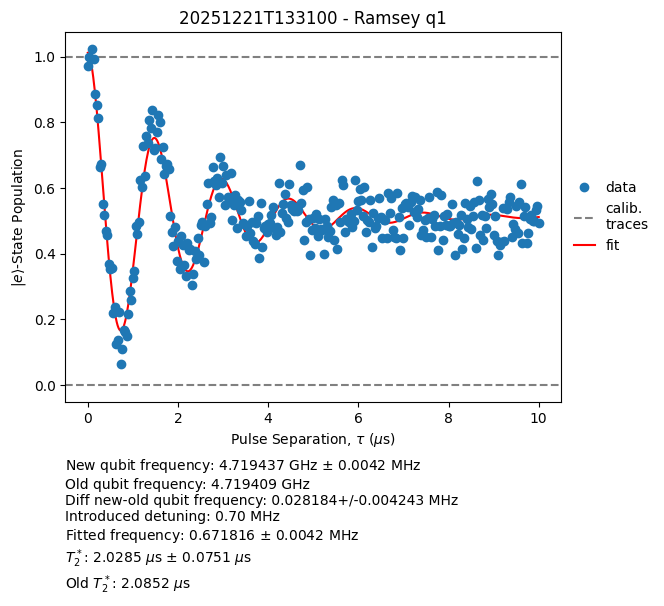

In [19]:
from experiments import ramsey

q = qubits[1]
temporary_parameters = {}
temp_pars =deepcopy(q.parameters)
#temp_pars.resonance_frequency_ge = 4.9528e9
temporary_parameters[q.uid] = temp_pars
#######################################################################
delays = np.linspace(0,10e-6,301)
detunings = 0.7e6,
pprint(q.readout_parameters())
#######################################################################
options = ramsey.experiment_workflow.options()
options.update(True)
options.count(1024)
options.use_cal_traces(True)
# Build and run Ramsey workflow (no explicit command table options required)
ramsey_wf = ramsey.experiment_workflow(
    session=session,
    qpu=qpu,
    qubits=q,
    delays=delays,
    detunings=detunings,
    options=options,
    temporary_parameters=temporary_parameters
)
ramsey_result = ramsey_wf.run()
#qubit_spec_compiled = session.compile(amplitude_rabi.create_experiment(qpu=qpu,qubit=q,amplitudes=amplitudes, options=options))
print(ramsey_result.tasks['analysis_workflow'].output)
ramsey_result.tasks['analysis_workflow'].tasks['plot_population'].output['q1']

# x180



In [ ]:
from laboneq_applications.experiments import amplitude_fine
q = qubits[0]
temporary_parameters = {}
temp_pars =deepcopy(q.parameters)
temporary_parameters[q.uid] = temp_pars

#######################################################################
repetitions =np.arange(1,10) # Due to short T1, 20   
#######################################################################
options = amplitude_fine.experiment_workflow_x180.options()
options.update(False)
options.use_cal_traces(True)
#options.do_pca(False)

#print(workflow.show_fields(options))

###################################################################
error_amp = amplitude_fine.experiment_workflow_x180(
    session=session,
    qpu=qpu,
    qubits=q,
    repetitions=repetitions,
    temporary_parameters=temporary_parameters,
    options=options
)

error_amp_result = error_amp.run()
#qubit_spec_compiled = session.compile(amplitude_rabi.create_experiment(qpu=qpu,qubit=q,amplitudes=amplitudes, options=options))
print(error_amp_result.tasks['analysis_workflow'].output)

# X90

In [ ]:
from laboneq_applications.experiments import amplitude_fine
q = qubits[0]
temporary_parameters = {}
temp_pars =deepcopy(q.parameters)
temporary_parameters[q.uid] = temp_pars
#######################################################################
repetitions =np.arange(1,10)
#######################################################################
options = amplitude_fine.experiment_workflow_x90.options()
options.update(False)
options.use_cal_traces(True)
options.do_pca(False)
options.count(1024)

#print(workflow.show_fields(options))

###################################################################
error_amp_half = amplitude_fine.experiment_workflow_x90(
    session=session,
    qpu=qpu,
    qubits=q,
    repetitions=repetitions,
    temporary_parameters=temporary_parameters,
    options=options
)

error_amp_half_result = error_amp_half.run()
#qubit_spec_compiled = session.compile(amplitude_rabi.create_experiment(qpu=qpu,qubit=q,amplitudes=amplitudes, options=options))
print(error_amp_half_result.tasks['analysis_workflow'].output)

# DRAG

In [ ]:
from laboneq_applications.experiments import drag_q_scaling
q = qubits[1]
temporary_parameters = {}
temp_pars =deepcopy(q.parameters)
temp_pars.ge_drive_pulse['beta'] =0
temporary_parameters[q.uid] = temp_pars
#######################################################################
q_scalings = np.linspace(-0.05,0.1,51)
#######################################################################
options = drag_q_scaling.experiment_workflow.options()
options.update(True)



#print(workflow.show_fields(options))

###################################################################
drag = drag_q_scaling.experiment_workflow(
    session=session,
    qpu=qpu,
    qubits=q,
    q_scalings=q_scalings,
    options=options
)

drag_result = drag.run()
#qubit_spec_compiled = session.compile(amplitude_rabi.create_experiment(qpu=qpu,qubit=q,amplitudes=amplitudes, options=options))
print(drag_result.tasks['analysis_workflow'].output)

# RB

LaboneQ Benchmark 확인필요

In [ ]:
from laboneq_applications.experiments import d
 
#######################################################################


# RIP

This notebook is dedicated to TG's RIP gate calibration

### Current issues

1. phase sweep for detuning is not implemented 
2. First prepare state section takes 80ns length for unknown reason (might be related to port delay calibration setting)
3. Folderstore not working... 

In [ ]:
from experiments import rip2

#q = qubits[1]
#temporary_parameters = q.parameters.copy()

#######################################################################

#######################################################################
options = rip2.experiment_workflow.options()
options.update(False)

#print(workflow.show_fields(options))

###################################################################
bus_freq = 6.534e9
bus_amp = 1.0

rip_drive_controlg = rip2.experiment_workflow(
    session=session,
    qpu=qpu,
    ctrl=qubits[1],
    targ=qubits[0],
    bus=qubits[2],
    bus_frequency=bus_freq,
    bus_amplitude=bus_amp,
    delays=np.linspace(80e-9, 880e-9, 201),
    detunings=0.0e6,
    c_prep = "g",
    #frequencies=qubits[2].parameters.resonance_targ_frequency + np.linspace(-10e6,10e6,6),
    #amplitudes=np.linspace(0.0, 1.0, 11),
    options=options 
)
rip_drive_controle = rip2.experiment_workflow(
    session=session,
    qpu=qpu,
    ctrl=qubits[1],
    targ=qubits[0],
    bus=qubits[2],
    bus_frequency=bus_freq,
    bus_amplitude=bus_amp,
    delays=np.linspace(80e-9, 880e-9, 201),
    detunings=0.0e6,
    c_prep = "e",
    #frequencies=qubits[2].parameters.resonance_targ_frequency + np.linspace(-10e6,10e6,6),
    #amplitudes=np.linspace(0.0, 1.0, 11),
    options=options 
)

rip_result_control_g = rip_drive_controlg.run()
rip_result_control_e = rip_drive_controle.run()
#qubit_spec_compiled = session.compile(amplitude_rabi.create_experiment(qpu=qpu,qubit=q,amplitudes=amplitudes, options=options))
#print(drag_result.tasks['analysis_workflow'].output)

In [ ]:
rip_data_control_g = rip_result_control_g.output
rip_data_control_e = rip_result_control_e.output
duration = rip_data_control_g.data['q0']['result'].axis[0][0]


phase_control_g = rip_data_control_g.data['q0']['result'].data
phase_control_e = rip_data_control_e.data['q0']['result'].data
import matplotlib.pyplot as plt

control_g_g_point = rip_data_control_g.data['q0']['cal_trace'].g.data
control_g_e_point = rip_data_control_g.data['q0']['cal_trace'].e.data

control_e_g_point = rip_data_control_e.data['q0']['cal_trace'].g.data
control_e_e_point = rip_data_control_e.data['q0']['cal_trace'].e.data


plt.figure(figsize=(6,6))

plt.scatter(control_g_g_point.real, control_g_g_point.imag, color="red", label="|0> reference (g)")
plt.scatter(control_g_e_point.real, control_g_e_point.imag, color="blue", label="|1> reference (e)")
plt.scatter(control_e_g_point.real, control_e_g_point.imag, color="red", label="|0> reference (g)")
plt.scatter(control_e_e_point.real, control_e_e_point.imag, color="blue", label="|1> reference (e)")

plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.legend()


In [ ]:
from experiments import rip2

#q = qubits[1]
#temporary_parameters = q.parameters.copy()

#######################################################################

#######################################################################
options = rip2.experiment_workflow.options()
options.update(False)

#print(workflow.show_fields(options))

###################################################################
bus_freq = 5.99e9
bus_amp = 1.0

bus_freq_sweep = np.linspace(5.99e9,6.08e9,31)

ctrl_g = []
ctrl_e = []

for bf in bus_freq_sweep:
    print(f"Bus frequency : {bf/1e9} GHz")
    rip_drive_controlg = rip2.experiment_workflow(
        session=session,
        qpu=qpu,
        ctrl=qubits[1],
        targ=qubits[0],
        bus=qubits[2],
        bus_frequency=bf,
        bus_amplitude=bus_amp,
        delays=np.linspace(80e-9, 1600e-9, 153),
        detunings=0.0e6,
        c_prep = "g",
        #frequencies=qubits[2].parameters.resonance_targ_frequency + np.linspace(-10e6,10e6,6),
        #amplitudes=np.linspace(0.0, 1.0, 11),
        options=options 
    )
    rip_drive_controle = rip2.experiment_workflow(
        session=session,
        qpu=qpu,
        ctrl=qubits[1],
        targ=qubits[0],
        bus=qubits[2],
        bus_frequency=bf,
        bus_amplitude=bus_amp,
        delays=np.linspace(80e-9, 1600e-9, 153),
        detunings=0.0e6,
        c_prep = "e",
        #frequencies=qubits[2].parameters.resonance_targ_frequency + np.linspace(-10e6,10e6,6),
        #amplitudes=np.linspace(0.0, 1.0, 11),
        options=options 
    )

    rip_result_control_g = rip_drive_controlg.run()
    rip_result_control_e = rip_drive_controle.run()

    ctrl_g.append(rip_result_control_g)
    ctrl_e.append(rip_result_control_e)

In [ ]:
# rip_data_control_g = rip_result_control_g.output
# rip_data_control_e = rip_result_control_e.output

rip_data_control_g = ctrl_g[29].output
rip_data_control_e = ctrl_e[29].output

In [ ]:
duration = rip_data_control_g.data['q0']['result'].axis[0][0]

phase_control_g = rip_data_control_g.data['q0']['result'].data
phase_control_e = rip_data_control_e.data['q0']['result'].data

In [ ]:
import matplotlib.pyplot as plt

control_g_g_point = rip_data_control_g.data['q0']['cal_trace'].g.data
control_g_e_point = rip_data_control_g.data['q0']['cal_trace'].e.data

control_e_g_point = rip_data_control_e.data['q0']['cal_trace'].g.data
control_e_e_point = rip_data_control_e.data['q0']['cal_trace'].e.data


plt.figure(figsize=(6,6))

plt.scatter(control_g_g_point.real, control_g_g_point.imag, color="red", label="|0> reference (g)")
plt.scatter(control_g_e_point.real, control_g_e_point.imag, color="blue", label="|1> reference (e)")
plt.scatter(control_e_g_point.real, control_e_g_point.imag, color="red", label="|0> reference (g)")
plt.scatter(control_e_e_point.real, control_e_e_point.imag, color="blue", label="|1> reference (e)")

plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.legend()

In [ ]:
def normalize_population(points, g, e):
    """
    points: list or numpy array of complex numbers
    return: array of normalized values in [0,1]
    """
    points = np.array(points, dtype=complex)
    d0 = np.abs(points - g)
    d1 = np.abs(points - e)
    return d0 / (d0 + d1)

new_phase_control_g = []
new_phase_control_e = []

for i in range(len(phase_control_g)):
    # 2. Calculate the value and append it to the new row
    normalized_value = normalize_population(phase_control_g[i], control_g_g_point, control_g_e_point)
    new_phase_control_g.append(normalized_value)
for k in range(len(phase_control_e)):
    # 2. Calculate the value and append it to the new row
    normalized_value = normalize_population(phase_control_e[k], control_e_g_point, control_e_e_point)
    new_phase_control_e.append(normalized_value)
# 3. Append the completed row to the main population list

population_control_g = new_phase_control_g
population_control_e = new_phase_control_e
plt.figure(figsize=(8,6))
plt.plot(duration, population_control_g, color="#ff5500", label = r'control: |g>')
plt.plot(duration, population_control_e, color="#0055aa", label = r'control: |e>')
plt.ylim([-0.1,1.1])
plt.xlabel("RIP duration (s)", fontsize=16)
plt.ylabel("population", fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fontsize=14)


# SAVING data 

In [ ]:
#ctrl_g[0].output

In [ ]:
from laboneq.simple import save, load

bus_freq_sweep * 1e-9


for i, bf in enumerate(bus_freq_sweep *1e-9):
    save(ctrl_g[i].output, filename=f'1029_rip_control_g_bf_{bf:.3f}_amp1.0')
    save(ctrl_e[i].output, filename=f'1029_rip_control_e_bf_{bf:.3f}_amp1.0')


#save(rip_result_control_g.output, filename='1023_control_g_bf_5.535_amp1.0')
#save(rip_result_control_e.output, filename='1023_control_e_bf_5.535_amp1.0')


In [ ]:
qubits[2].parameters.resonance_targ_frequency = 5.6e9
qubits[2].parameters.resonance_targ_frequency

In [ ]:
from laboneq.simple import show_pulse_sheet
from laboneq.contrib.example_helpers.plotting.plot_helpers import plot_simulation

#show_pulse_sheet(compiled_experiment=rip_result.tasks["compile_experiment"].output,name='test', interactive=True, max_events_to_publish=100000)
plot_simulation(compiled_experiment=rip_result_control_g.tasks["compile_experiment"].output)
plot_simulation(compiled_experiment=rip_result_control_e.tasks["compile_experiment"].output)

In [ ]:
from laboneq.simple import save, load

save(rip_result.output, filename='0909n_e_0.6')
load(filename='0909n_e_0.6')

In [ ]:
from laboneq_applications.analysis.calibration_traces_rotation import (
    calculate_qubit_population_2d,
    calculate_qubit_population
)
targ= qubits[0]
delays=np.linspace(300e-9, 2000e-9,101)
frequencies = qubits[2].parameters.resonance_targ_frequency + np.linspace(-10e6,10e6,6)
processed_d=calculate_qubit_population_2d(qubits=targ, result=rip_result.output, sweep_points_1d=delays, sweep_points_2d=frequencies)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(processed_d['q0']['population'][1,:])
plt.ylim([-0.1, 1.1])
plt.show()

In [ ]:
from laboneq_applications.analysis import iq_blobs
from laboneq_applications.experiments import iq_blobs

#######################################################################
q = qubits[0]

print(f"DRIVE range (dBm) : {q.parameters.drive_range}, READOUT range (dBm) : {q.parameters.readout_range_out}")
#######################################################################
options = iq_blobs.experiment_workflow.options()

#print(workflow.show_fields(options))

###################################################################
iq = iq_blobs.experiment_workflow(
    session=session,
    qpu=qpu,
    qubits=q,
    options=options,
    states='ge'
)

iq_result = iq.run()
#qubit_spec_compiled = session.compile(amplitude_rabi.create_experiment(qpu=qpu,qubit=q,amplitudes=amplitudes, options=options))
print(iq_result.tasks['analysis_workflow'].output)


# Basic Readout optimization
Here we optimize SNR via

* `readout_length`
* `readout-amplitude`

* `readout_integration_length`
* `readout_integration_delay`
* `readout_integration_weight`

In [ ]:
from experiments import dispersive_shift

In [ ]:
from experiments import time_traces

# Save Qubit Parameters

In [20]:
from helper import load_qubit_parameters, save_qubit_parameters
save_qubit_parameters(qubits={ qubit.uid : qubit for qubit in qubits}, save_folder="./qubit_parameters/", filename="COSPEC20")

Qubit parameters stored as JSON in /home/yalgaeahn/JSAHN/qubit-experiment/examples/qubit_parameters/20251221-1332_COSPEC20.json
